In [1]:
import pandas as pd

data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=',') 

data

,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_desconocido,orderState_failed,orderState_fulfilled,...,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,False,0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,False,1,False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,True,False,False
2,False,0,False,False,False,True,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
3,False,0,False,True,False,False,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
4,True,1,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,True,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
619,True,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
620,False,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
621,False,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False


Separacion de la data

In [2]:
data_x = data.drop('fraudulent', axis=1)
data_y = data['fraudulent']

In [3]:
data_x = data_x.values
data_y = data_y.values

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

Creacion del modelo predictivo

In [5]:
from sklearn.ensemble import RandomForestClassifier 

# Creamos 1000 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 99)

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=99)

3.4) matriz de confusion

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

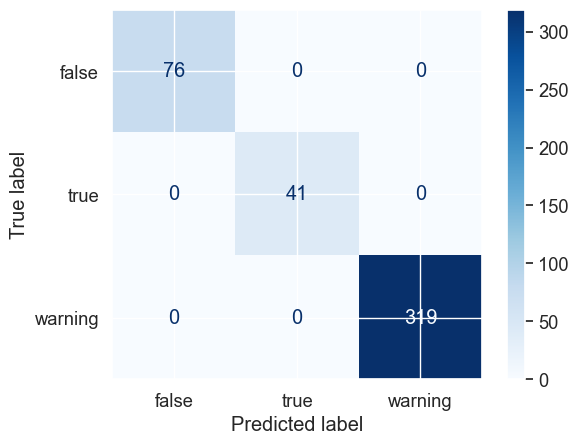

In [7]:
import seaborn as sns

sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['false','true','warning'],
    cmap='Blues',
    )

# 4) Guardamos el modelo:

In [8]:
import pickle

filename = '../model/modelo_proyecto_final.pkl'
pickle.dump(rf, open(filename, 'wb'))